In [6]:
import warnings 

warnings.filterwarnings(action='ignore')

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [114]:
plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [107]:
# Covid_case.csv 파일에서 필요데이터만 불러와 'Covid_data_new' DataFrame에 저장

covid_data=pd.read_csv('data/Covid_case.csv')
covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new=covid_data_new.dropna(axis=0)
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-24,3269.0,295132.0,2434.0,2021.0,9.0
2021-09-23,2433.0,292699.0,2427.0,2021.0,9.0
2021-09-22,1716.0,290983.0,2419.0,2021.0,9.0
2021-09-21,1720.0,289263.0,2413.0,2021.0,9.0
2021-09-20,1729.0,287534.0,2409.0,2021.0,9.0


In [99]:
# Covid_data_new의 datily_decideCnt를 100단위로 번주화

covid_data_new['categorize_100']=covid_data_new.daily_decideCnt//100
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month,day_of_week,categorize_100
stateDt,,,,,,,
2021-09-24,3269.0,295132.0,2434.0,2021.0,9.0,FRI,32.0
2021-09-23,2433.0,292699.0,2427.0,2021.0,9.0,THU,24.0
2021-09-22,1716.0,290983.0,2419.0,2021.0,9.0,WED,17.0
2021-09-21,1720.0,289263.0,2413.0,2021.0,9.0,TUE,17.0
2021-09-20,1729.0,287534.0,2409.0,2021.0,9.0,MON,17.0


In [100]:
covid_data_new.categorize_100.describe()

count    602.000000
mean       4.508306
std        5.506381
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       32.000000
Name: categorize_100, dtype: float64

32개의 범위로 범주화되었다

In [101]:
#분기별 교통량 데이터 불러오기
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

#분기별 교통량 데이터 합치기
traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])

#교통량 데이터 필요 칼럼만 추출
traffic_data.index=pd.to_datetime(traffic_data['집계일자'],format='%Y%m%d')
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]

#불규칙 업소명 통일화
traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275
2018-01-01,가락,615,14,5,14,96,26,770
2018-01-01,가락(개),2358,31,48,57,131,273,2898
2018-01-01,가락(개),7148,27,71,27,267,378,7918
2018-01-01,가락(개),2946,29,52,48,150,357,3582


# 전국 교통량&코로나 범주화

In [120]:
# 전국 교통량 합산

traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total['year']=traffic_data_total.index.year
traffic_data_total.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year
집계일자,,,,,,,,
2018-01-01,5562671,64729,140284,36796,34705,240045,6079230,2018
2018-01-02,4945308,200328,257620,163881,234282,290196,6091615,2018
2018-01-03,4841053,232174,293244,212214,294425,289377,6162487,2018
2018-01-04,4902656,232305,293413,209227,300632,291083,6229316,2018
2018-01-05,5342859,233726,299322,209493,299666,310678,6695744,2018


In [122]:
traffic_data_total[(traffic_data_total.year==2018)|(traffic_data_total.year==2019)].describe()['총교통량']

count    7.300000e+02
mean     6.880140e+06
std      6.252896e+05
min      4.278579e+06
25%      6.564867e+06
50%      6.927820e+06
75%      7.210120e+06
max      9.878294e+06
Name: 총교통량, dtype: float64

코로나19 발생 이전의 교통량은 평균 6.8*10^6이었다.

In [108]:
#교통량 데이터와 코로나19 확진자수 데이터를 날짜를 기준으로 병합

data_mart_total=covid_data_new.join(traffic_data_total, how='outer')
data_mart_total=data_mart.dropna(axis=0)
data_mart_total['date']=data_mart_total.index
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
data_mart_total['day_of_week']=data_mart_total.index.dayofweek
data_mart_total.day_of_week=data_mart_total.day_of_week.apply(lambda x : days[x])
data_mart_total

,daily_decideCnt,decideCnt,deathCnt,year,month,categorize_100,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,date,day_of_week
2020-01-01,0.0,0.0,0.0,2020.0,1.0,0.0,5179287.0,69285.0,139674.0,56505.0,47966.0,219017.0,5711734.0,2020-01-01,WED
2020-02-01,2.0,0.0,0.0,2020.0,2.0,0.0,5135494.0,114962.0,187389.0,103400.0,161167.0,248607.0,5951019.0,2020-02-01,SAT
2020-02-02,13.0,2.0,2.0,2020.0,2.0,0.0,4278047.0,51056.0,137707.0,43448.0,42489.0,201165.0,4753912.0,2020-02-02,SUN
2020-02-03,1.0,15.0,0.0,2020.0,2.0,0.0,5125555.0,215633.0,281127.0,207651.0,299129.0,297892.0,6426987.0,2020-02-03,MON
2020-02-04,3.0,16.0,0.0,2020.0,2.0,0.0,5003574.0,225437.0,292183.0,231059.0,321644.0,290544.0,6364441.0,2020-02-04,TUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,614.0,154456.0,2012.0,2021.0,6.0,6.0,6655649.0,120116.0,157780.0,116659.0,200051.0,281180.0,7531435.0,2021-06-26,SAT
2021-06-27,501.0,155070.0,2013.0,2021.0,6.0,5.0,6259574.0,56712.0,102220.0,52385.0,56189.0,250514.0,6777594.0,2021-06-27,SUN
2021-06-28,595.0,155571.0,2015.0,2021.0,6.0,5.0,5983959.0,226402.0,269051.0,233856.0,353371.0,310826.0,7377465.0,2021-06-28,MON
2021-06-29,794.0,156166.0,2017.0,2021.0,6.0,7.0,5795714.0,241538.0,282050.0,257449.0,373104.0,303186.0,7253041.0,2021-06-29,TUE


<AxesSubplot:xlabel='categorize_100', ylabel='count'>

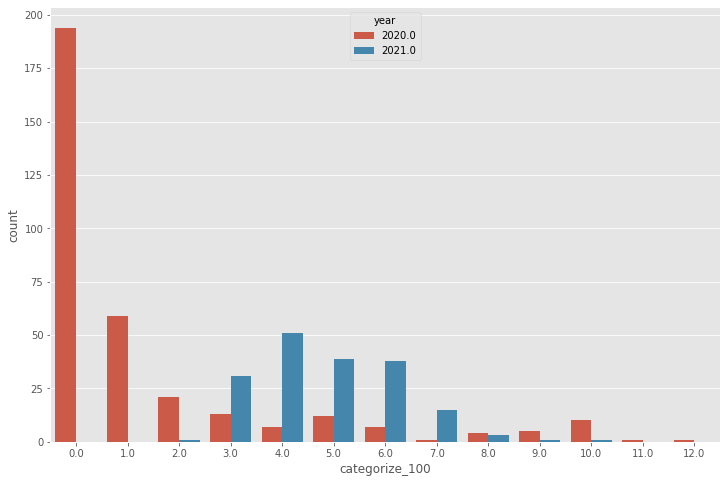

In [91]:
plt.figure(figsize=(12,8))
sns.countplot(x='categorize_100',data=data_mart_total,hue='year')

대부분은 확진자수 값은 0~12의 범주에 있다

<AxesSubplot:xlabel='categorize_100', ylabel='1종교통량'>

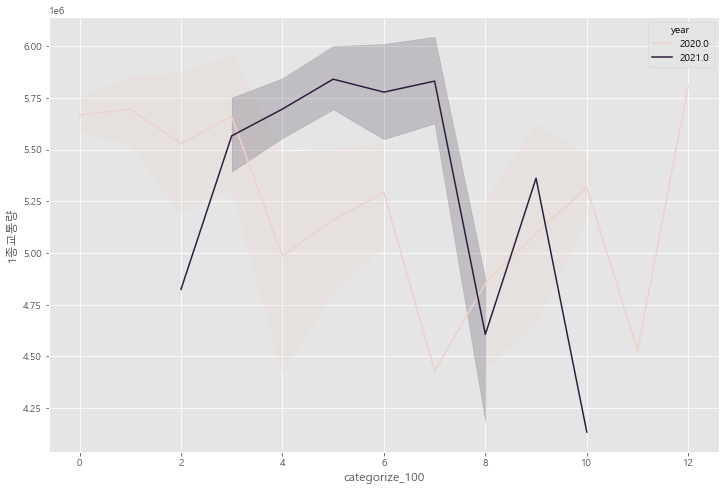

In [128]:
#확진자수가 0~99일 때 교통량 변화

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_100', y='1종교통량',data=data_mart_total,hue='year')

<AxesSubplot:xlabel='categorize_100', ylabel='총교통량'>

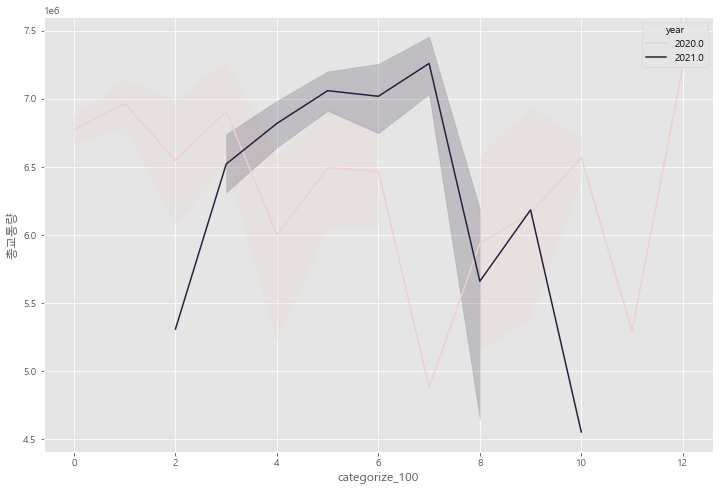

In [130]:
#확진자수가 0~99일 때 교통량 변화

plt.figure(figsize=(12,8))
sns.lineplot(x='categorize_100', y='총교통량',data=data_mart_total,hue='year')